<a href="https://colab.research.google.com/github/kelvinmw1/week2_data_science-assignment/blob/main/week_2_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy



In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('1. Weather Data.csv')
print(df)


             Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0        1/1/2012 0:00    -1.8              -3.9         86                4   
1        1/1/2012 1:00    -1.8              -3.7         87                4   
2        1/1/2012 2:00    -1.8              -3.4         89                7   
3        1/1/2012 3:00    -1.5              -3.2         88                6   
4        1/1/2012 4:00    -1.5              -3.3         88                7   
...                ...     ...               ...        ...              ...   
8779  12/31/2012 19:00     0.1              -2.7         81               30   
8780  12/31/2012 20:00     0.2              -2.4         83               24   
8781  12/31/2012 21:00    -0.5              -1.5         93               28   
8782  12/31/2012 22:00    -0.2              -1.8         89               28   
8783  12/31/2012 23:00     0.0              -2.1         86               30   

      Visibility_km  Press_kPa         

In [14]:
#to get the number of records and features

number_of_records = df.shape[0]
number_of_features = df.shape[1]
print(f"Number of records: {number_of_records}")
print(f"Number of features: {number_of_features}")

#to get the data types of features
df.dtypes

#to get the summary of key characteristics/statistical
df.describe()






Number of records: 8784
Number of features: 8


,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [13]:
#identifying missing values
missing_values = df.isnull().sum()
print(missing_values)


Date/Time            0
Temp_C               0
Dew Point Temp_C     0
Rel Hum_%            0
Wind Speed_km/h      0
Visibility_km        0
Press_kPa            0
Weather_condition    0
dtype: int64


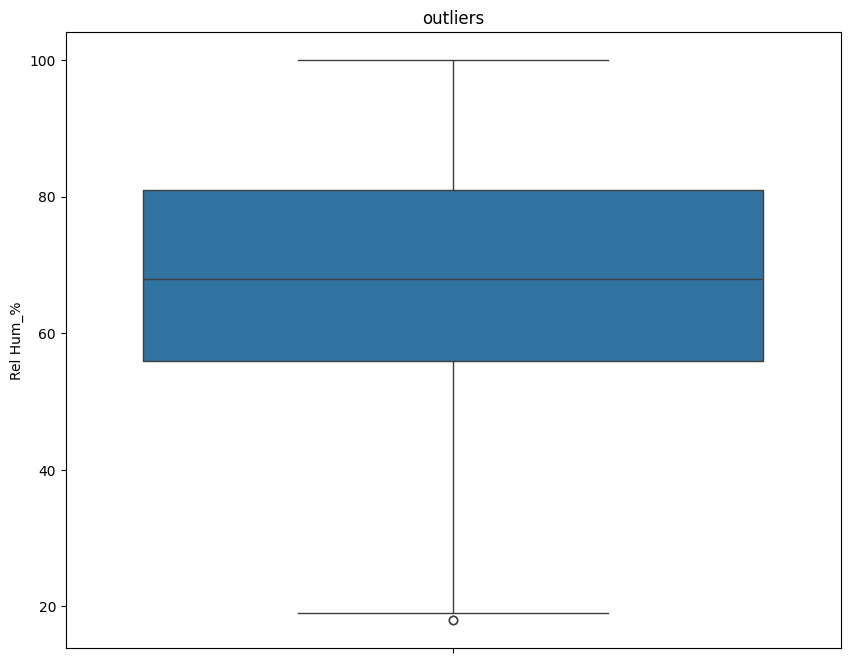

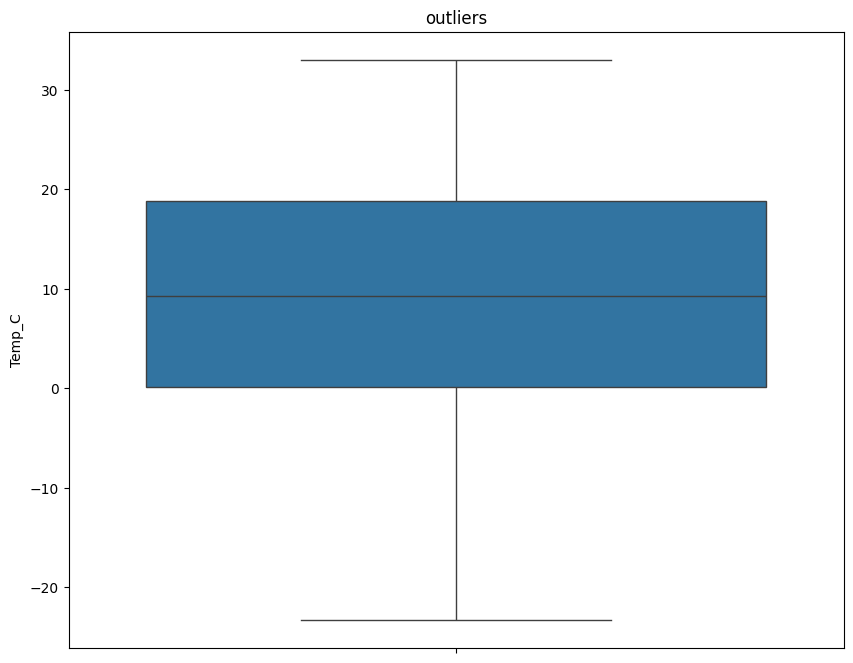

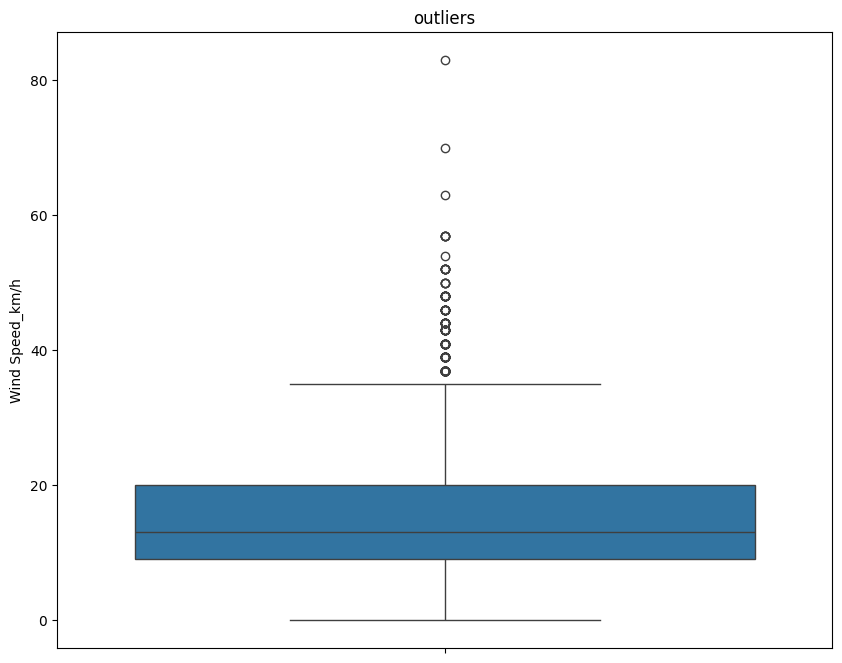

In [18]:
#there were no missing values hence no need to clean the data

#let us look for outliers(these are figures that might be out of the range)

#humidity

plt.figure(figsize=(10,8))
sns.boxplot(df['Rel Hum_%'])
plt.title('outliers')
plt.show()

#teperature

plt.figure(figsize=(10,8))
sns.boxplot(df['Temp_C'])
plt.title('outliers')
plt.show()

#wind speed

plt.figure(figsize=(10,8))
sns.boxplot(df['Wind Speed_km/h'])
plt.title('outliers')
plt.show()





In the data above, the wind speed had so many outliers, but i decided not to handle them because it looked like normal speed variations and they would not affect my data.

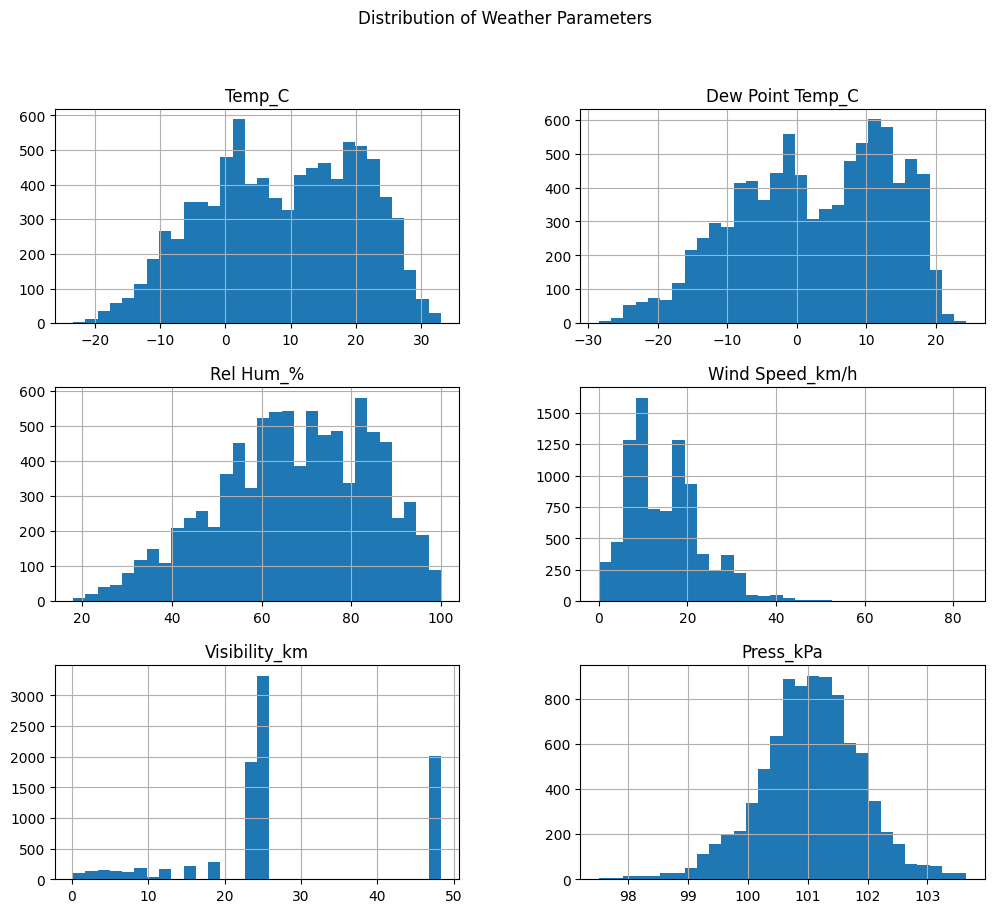

In [19]:
#let us now look at the weather distribution patterns using a histogram

df.hist(figsize=(12, 10), bins=30)
plt.suptitle('Distribution of Weather Parameters')
plt.show()



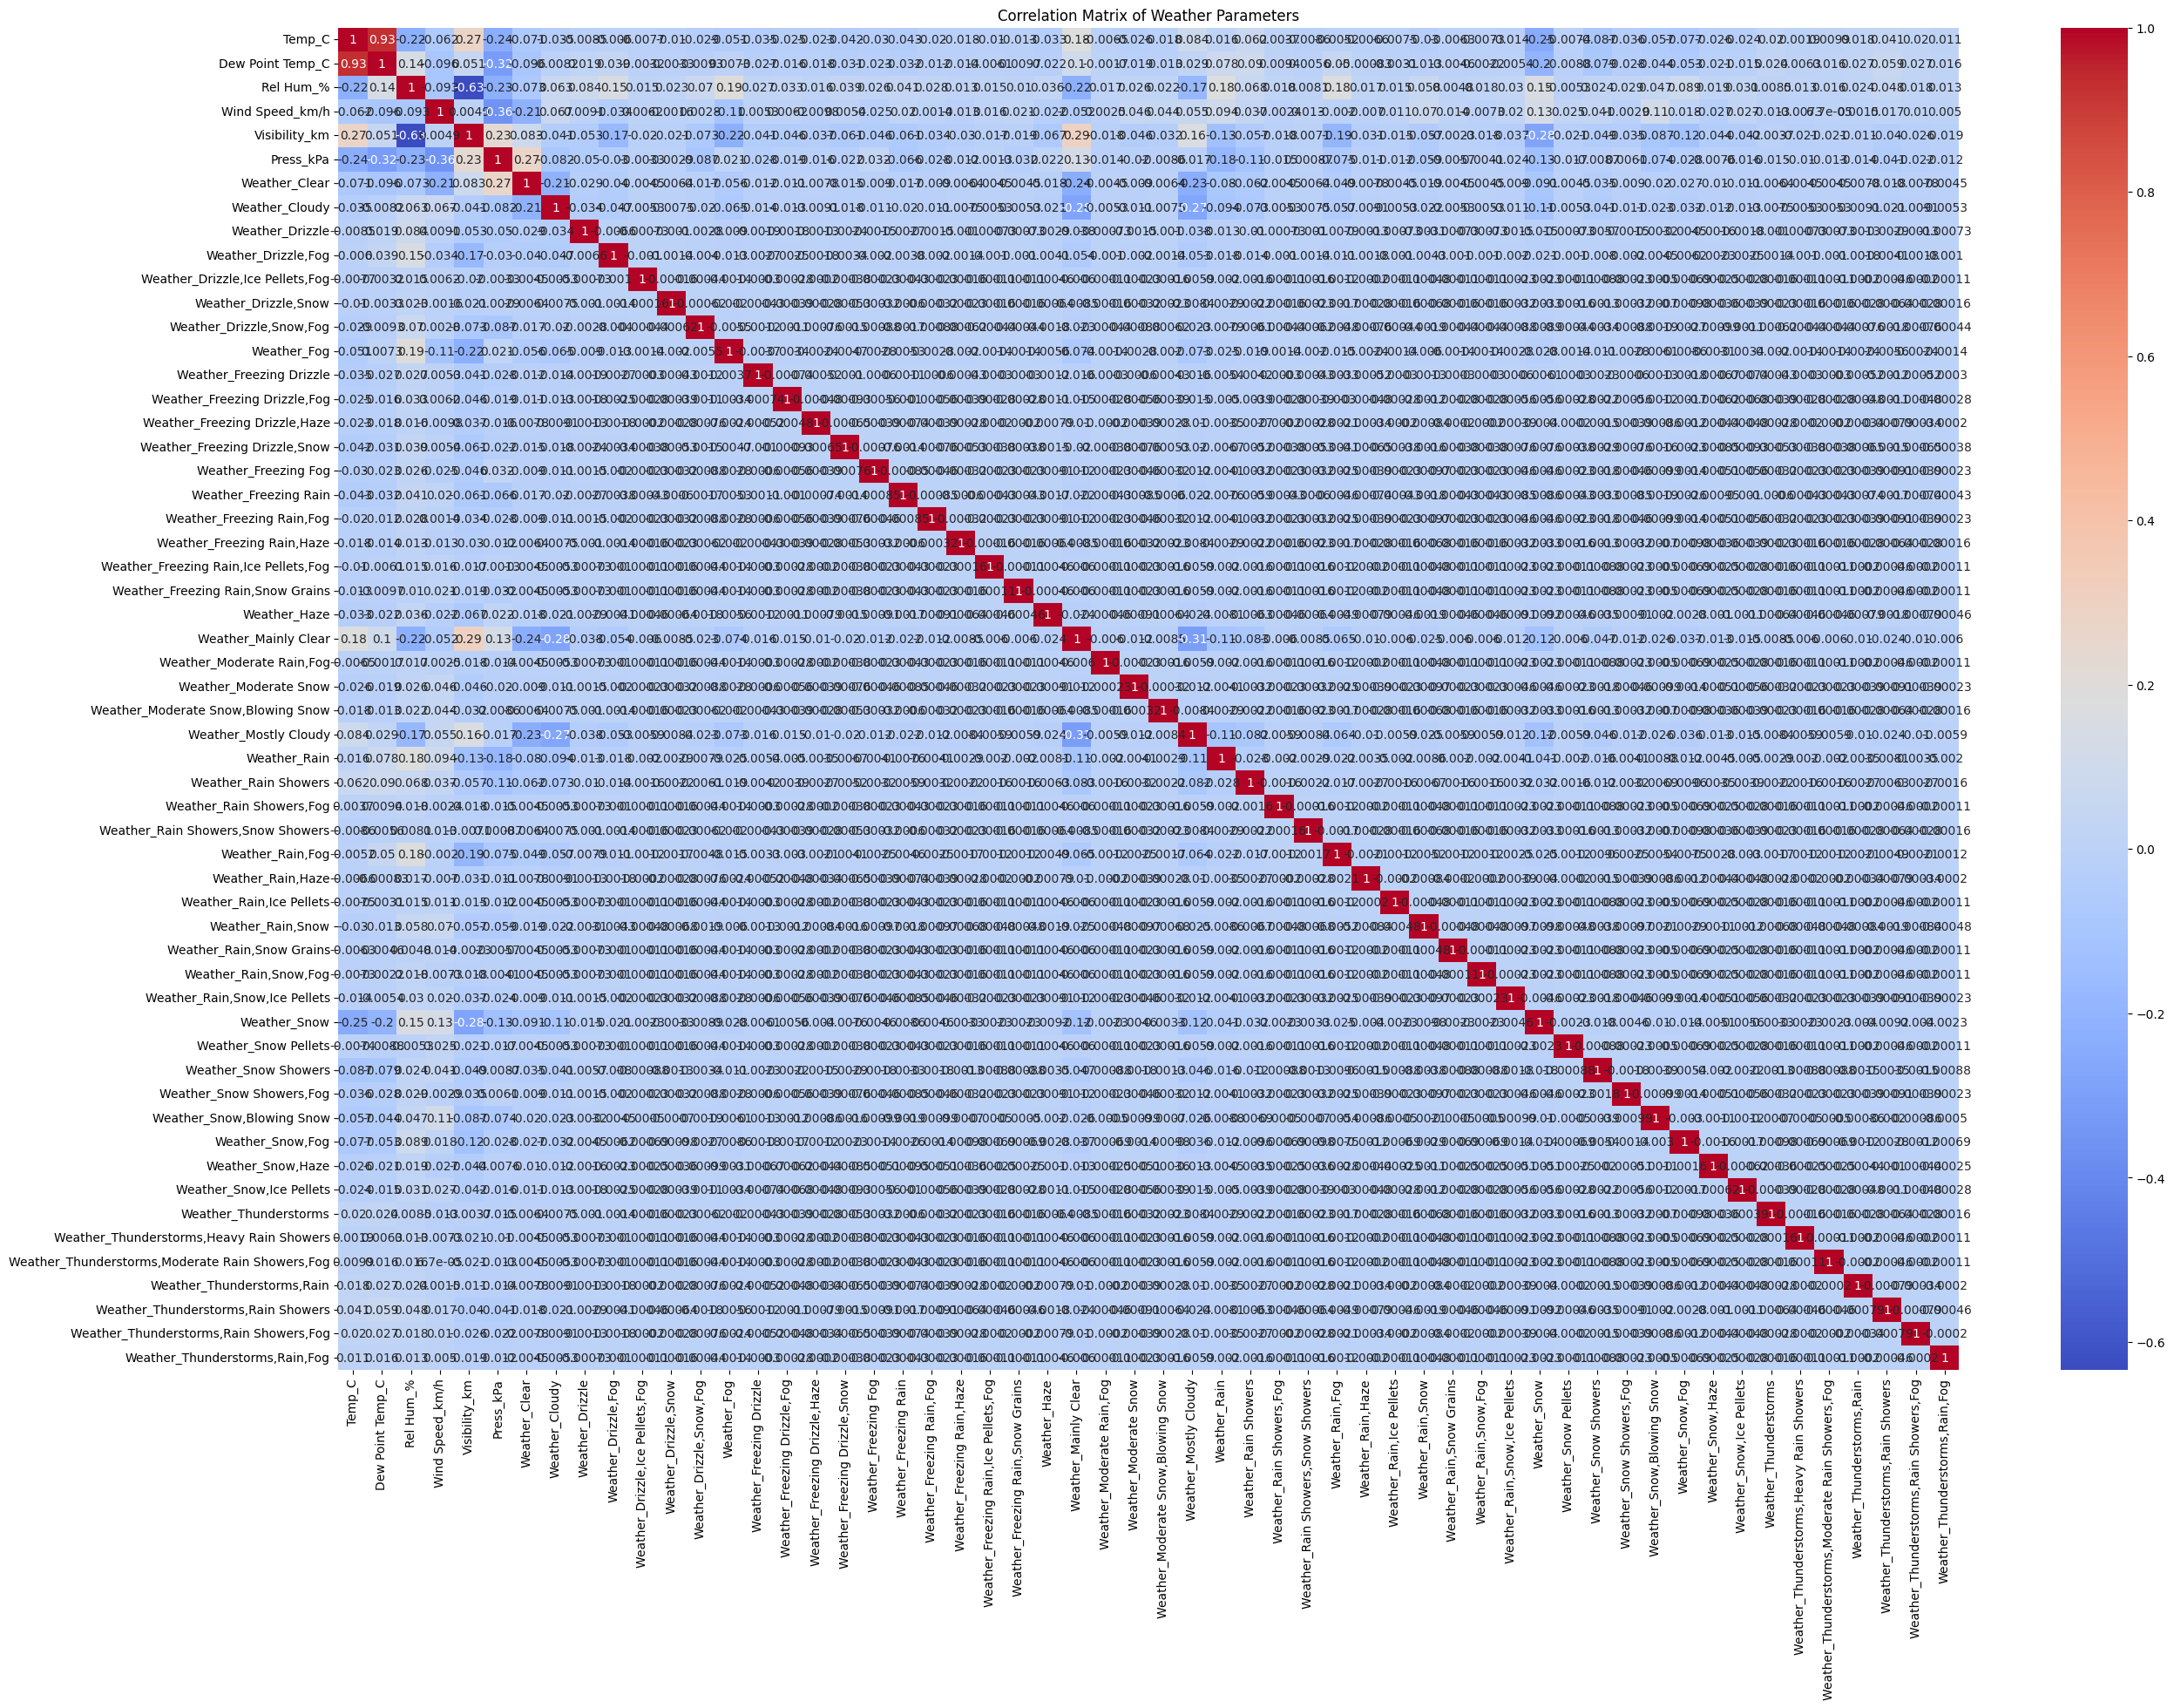

In [37]:
#let us now get into some statistical methods
#i struggled a lot here, so i ended up using gemini and chat gpt, but i do not think the matrix is insightful enough

# Convert the 'Weather' column to a numerical representation
df_encoded = pd.get_dummies(df, columns=['Weather'])

# Calculate the correlation matrix on the encoded DataFrame
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Weather Parameters')
plt.show()


In [47]:
# Example: Grouping by month to analyze trends
# i was unable to handle this, could not go around analyzing the data in months



In [55]:
#let me try to identify anomalies
anomalies = df[(df['Temp_C'] < 0) & (df['Wind Speed_km/h'] <= 70)]
print(anomalies)

                     Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
Date/Time                                                                   
2012-01-01 00:00:00    -1.8              -3.9         86                4   
2012-01-01 01:00:00    -1.8              -3.7         87                4   
2012-01-01 02:00:00    -1.8              -3.4         89                7   
2012-01-01 03:00:00    -1.5              -3.2         88                6   
2012-01-01 04:00:00    -1.5              -3.3         88                7   
...                     ...               ...        ...              ...   
2012-12-31 16:00:00    -1.4              -4.0         82               13   
2012-12-31 17:00:00    -1.1              -3.3         85               19   
2012-12-31 18:00:00    -1.3              -3.1         88               17   
2012-12-31 21:00:00    -0.5              -1.5         93               28   
2012-12-31 22:00:00    -0.2              -1.8         89               28   

In [ ]:
#the rest of the task was kinda hard for me, but i will make sure to complete it